In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
X_train.shape
X_test.shape

(10000, 28, 28)

7


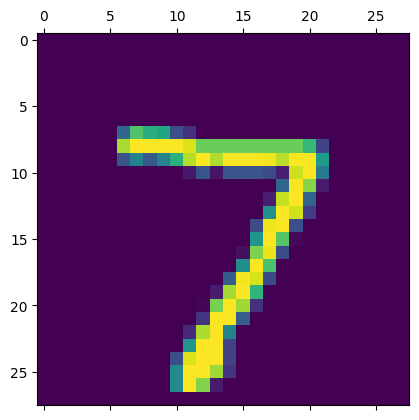

In [5]:
len(X_test[0])
plt.matshow(X_test[0])
print(y_test[0])

In [6]:
X_train_flattened=X_train.reshape(len(X_train),-1)
X_test_flattened=X_test.reshape(len(X_test),-1)

In [7]:
X_train_flattened.shape
X_test_flattened.shape

X_train_flattened=X_train_flattened/255
X_test_flattened=X_test_flattened/255



In [8]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)




Epoch 1/5


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4722 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3046 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9228
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9262


In [9]:
y_predicted=model.predict(X_test_flattened)


313/313 [==============================] - 1s 2ms/step


In [10]:
y_predicted[0]

array([2.7088158e-02, 3.4871488e-07, 6.4978085e-02, 9.5612961e-01,
       2.4191160e-03, 9.3955345e-02, 1.7995159e-06, 9.9975538e-01,
       1.3218519e-01, 6.0808009e-01], dtype=float32)

In [11]:
np.argmax(y_predicted[0])
y_predicted_labels=[np.argmax(i) for i in y_predicted ]

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [12]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm.shape

TensorShape([10, 10])

<Axes: >

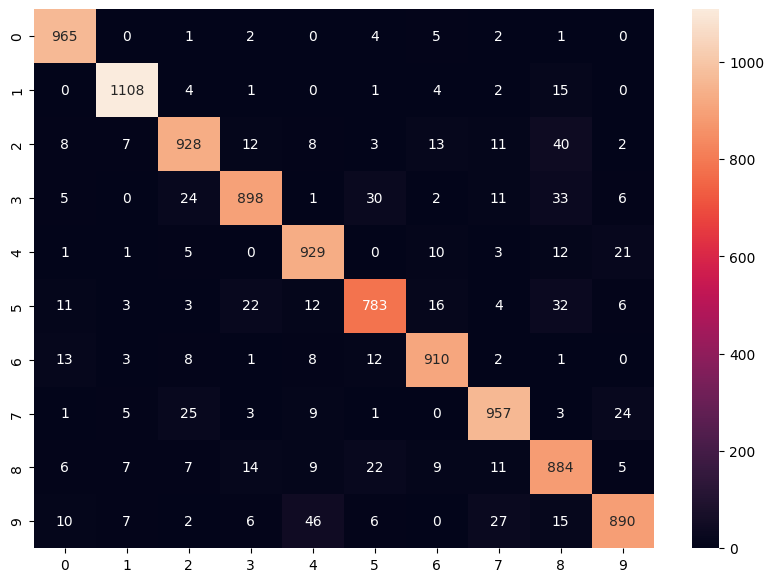

In [13]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')


In [14]:
#afer adding one hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2754 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1232 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0850 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0652 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0513 - accuracy: 0.9843


In [15]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted ]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm.shape

313/313 [==============================] - 1s 3ms/step


TensorShape([10, 10])

<Axes: >

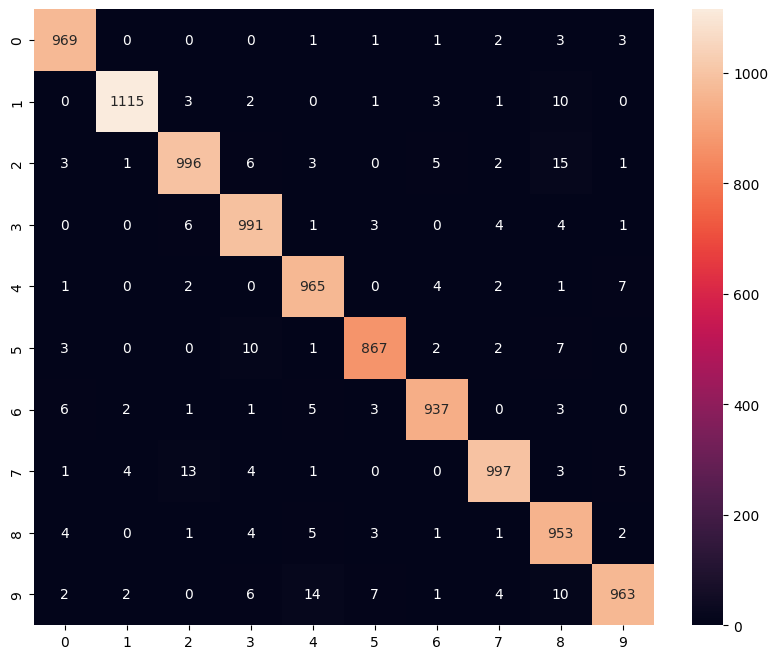

In [16]:
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True,fmt='d')

In [20]:
#afer adding one hidden layer 
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 3.0298 - accuracy: 0.8533
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4137 - accuracy: 0.9020
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2975 - accuracy: 0.9248
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2589 - accuracy: 0.9341
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2376 - accuracy: 0.9405
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2254 - accuracy: 0.9422
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2146 - accuracy: 0.9455
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1969 - accuracy: 0.9494
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1985 - accuracy: 0.9508
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss:

In [21]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.9419


[0.2685208320617676, 0.9419000148773193]

In [22]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape
X_test=X_test.reshape(-1,28,28,1)

In [24]:
#using cnn
model = keras.Sequential([
    
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=6)



Epoch 1/6
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4480 - accuracy: 0.9353
Epoch 2/6
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0760 - accuracy: 0.9768
Epoch 3/6
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0591 - accuracy: 0.9819
Epoch 4/6
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0466 - accuracy: 0.9859
Epoch 5/6
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 6/6
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0333 - accuracy: 0.9899


In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0928 - accuracy: 0.9784


[0.09284724295139313, 0.9783999919891357]